## Importações 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Floresta Aleatória
A floresta aleatória consiste em um grande número de árvores de decisão individuais que funcionam como um conjunto. Cada árvore individual na floresta aleatória gera uma previsão de classe e a classe com mais votos se torna a previsão do nosso modelo.

O conceito fundamental por trás da floresta aleatória é simples, mas poderoso: a sabedoria das multidões. Na linguagem da ciência de dados, a razão pela qual o modelo funciona tão bem está associado ao fato de que um grande número de modelos (árvores) relativamente não correlacionados que operam como um comitê superará qualquer um dos modelos constituintes individuais.

Para este modelo, o parâmetro mais básico a ser definido é o número de árvores presente na floresta.

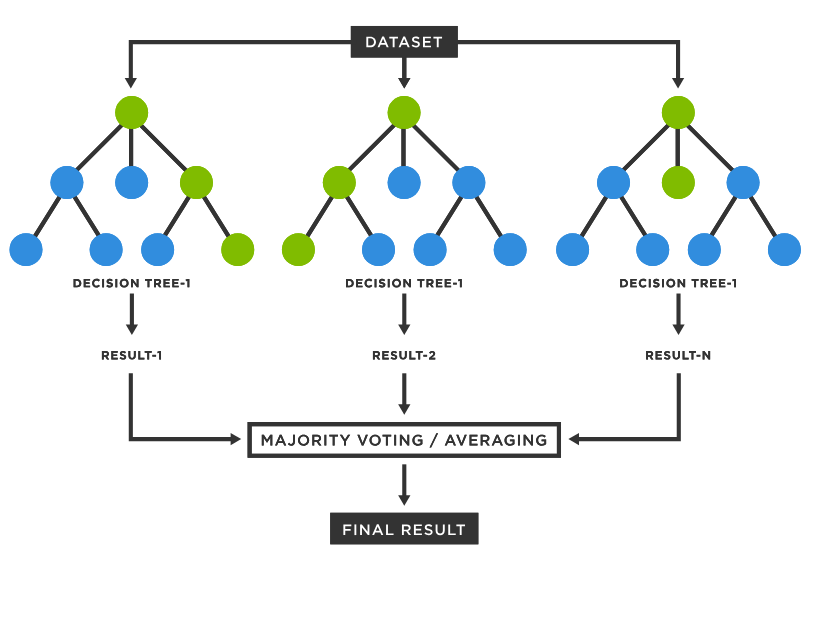

- Os dados utilizados estão na pasta dados contidos no arquivo ```disease.csv```.

In [2]:
df = pd.read_csv("dados/disease.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [4]:
X = df.drop('Outcome Variable', axis= 1)
Y = df['Outcome Variable']

In [5]:
# Binarização dos inputs categóricos
onehot = OneHotEncoder(sparse_output= False)
X_bin = onehot.fit_transform(X.select_dtypes(include= ['object']))
X_bin

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [6]:
# Normalização dos inputs numéricos
normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X.select_dtypes(exclude= ['object']))

In [7]:
# Junção dos inputs
X_all = np.append(X_norm, X_bin, axis= 1)
X_all

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08450704, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08450704, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.92957746, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

## Treinando o classificador
### Aplicando o classificador Random Forest
Parâmetros mais importantes:
- n_estimators: número de árvores
- max_depth: profundidade máxima da árvore
- max_samples: percentual (entre 0 e 1) da amostra utilizada na criação de cada árvore

In [8]:
# Divisão dos conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y, test_size= 0.20, random_state=42) 

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth= 21, max_samples= None, random_state= 1)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=21, random_state=1)

In [10]:
Y_pred = rf.predict(X_test)
Y_pred

array(['Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive'],
      dtype=object)

## Avaliando o classificador

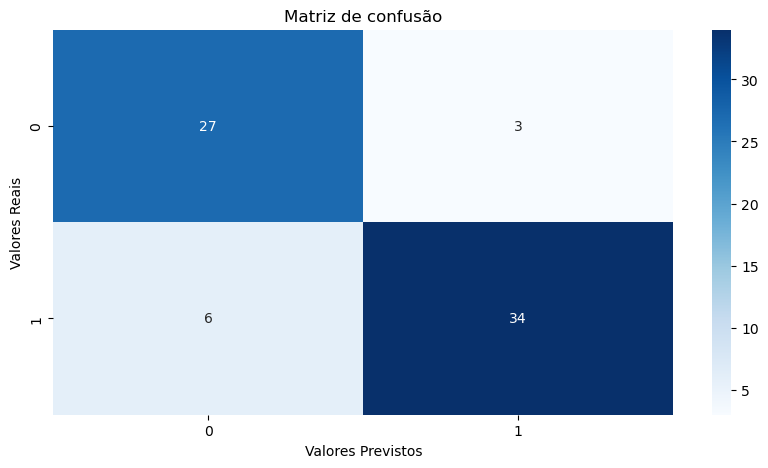

In [11]:
matriz_confusao = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize= (10, 5))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')

plt.show()

In [12]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

    Negative       0.90      0.82      0.86        33
    Positive       0.85      0.92      0.88        37

    accuracy                           0.87        70
   macro avg       0.88      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



In [13]:
accuracy_score(Y_test, Y_pred)

0.8714285714285714

- Obtemos uma precisão de 0.8714 (superior ao obtido pelo DT)

## Visualizando a acurácia obtida para cada número de árvores definida 

In [14]:
n_estimators = list(range(100, 200))
print(n_estimators)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [15]:
accu = []
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, random_state= 1)
    rf.fit(X_train, Y_train)
    accu.append(accuracy_score(Y_test, rf.predict(X_test)))

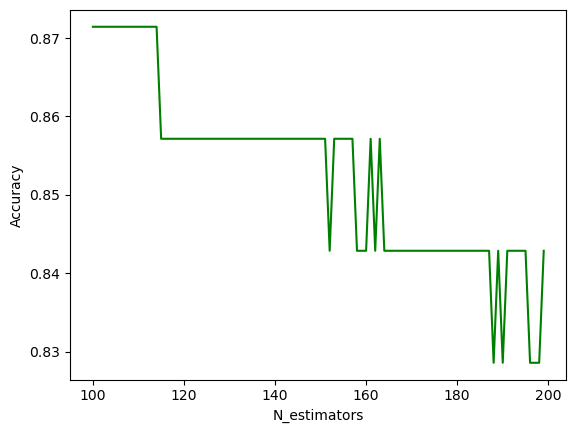

In [16]:
plt.plot(n_estimators, accu, color="g")
plt.xlabel("N_estimators")
plt.ylabel("Accuracy")
plt.show()